In [1]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("datasets_hotels.csv")
df.head(5)

,id_hotels,name,rating,number_of_ratings,rating_title,url,price,room_type,adress,location,Distance,Content,price_for,People numbers
0,0,Lan Vy Hotel,9.7,37 reviews,Fabulous,https://www.booking.com/hotel/vn/lan-vy-can-th...,23,Superior Double Room,"97D Pham Ngoc Thach, Cần Thơ, Việt Nam",Ninh Kiều,1.3 km from centre,Lan Vy Hotel is located in Can Tho. Only 1.3 k...,"1 night, 1 adult",1 double bed
1,1,Amazon 1,7.9,301 reviews,Good,https://www.booking.com/hotel/vn/amazon-1.en-g...,5,Bed in 4-Bed Dormitory Room,"88/24 Lê Lai, An Phú, Ninh Kiều, Thành phố Cần...",Ninh Kiều,0.4 km from centre\n,Situated in Can Tho and with Vincom Plaza Xuan...,"1 night, 1 adult",1 bunk bed
2,2,VẠN LỘC HOTEL,8.4,342 reviews,Very good,https://www.booking.com/hotel/vn/van-loc.en-gb...,15,Standard King Room,"76 Dong Khoi Street, Cần Thơ, Việt Nam",Ninh Kiều,0.4 km from centre\r,"Set in Can Tho, 800 metres from Ninh Kieu Pier...","1 night, 1 adult",1 large double bed
3,3,CALI HOTEL,7.7,285 reviews,Good,https://www.booking.com/hotel/vn/cali-can-tho1...,14,Standard King Room,"46 Lương Định Của, Phường Cái Khế, , Cái Khế, ...",Ninh Kiều,1.3 km from centre\r,"Located in Can Tho, within 1.1 km of Vincom Pl...","1 night, 1 adult",1 large double bed
4,4,Mekong Rose Hotel,8.3,81 reviews,Very good,https://www.booking.com/hotel/vn/mekong-rose-n...,11,Economy Double Room,"59-61 Ly Hong Thanh, P. Cai Khe, Q. Ninh Kieu,...",Ninh Kiều,1.4 km from centre\r,"Featuring a terrace, Mekong Rose Hotel is loca...","1 night, 1 adult",1 double bed


In [3]:
df.isna().sum()

id_hotels              0
name                   0
rating                 0
number_of_ratings      0
rating_title         195
url                    0
price                  0
room_type              0
adress                 0
location               1
Distance               0
Content                0
price_for              0
People numbers         0
dtype: int64

In [ ]:
#so sanh giua rating va price
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating.value_counts().index, y=df.price.value_counts().tolist())])
fig.update_layout(
    title="Biểu đồ so sánh giá khách sạn và độ rating",
    xaxis_title="Rating",
    yaxis_title="Giá")
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating_title.value_counts().index, y=df.rating_title.value_counts().tolist())])
fig.update_layout(
    title="Phân bố đánh giá người dùng",
    xaxis_title="Đánh giá",
    yaxis_title="Số lượng")
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating.value_counts().index, y=df.rating_title.value_counts().tolist())])
fig.update_layout(
    title="So sánh rating với rating title",
    xaxis_title="Rating",
    yaxis_title="Rating title")
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.number_of_ratings.value_counts().index, y=df.number_of_ratings.value_counts().tolist())])
fig.update_layout(
    title="Phân bố số lượng đánh giá",
    xaxis_title="Giá trị phân bố",
    yaxis_title="Số lượng")
fig.show()

In [ ]:
def sentiment(price):
  if price in range(0,10):
    return 'Giá Thấp'
  elif price in range(11,20):
    return 'Giá Trung Bình'
  else:
    return 'Giá Cao' 

df['price_list'] = df['price'].apply(sentiment)
df.head()

,id_hotels,name,rating,number_of_ratings,rating_title,url,price,room_type,adress,location,Distance,Content,price_for,People numbers,price_list
0,0,Lan Vy Hotel,9.7,37 reviews,Fabulous,https://www.booking.com/hotel/vn/lan-vy-can-th...,23,Superior Double Room,"97D Pham Ngoc Thach, Cần Thơ, Việt Nam",Ninh Kiều,1.3 km from centre,Lan Vy Hotel is located in Can Tho. Only 1.3 k...,"1 night, 1 adult",1 double bed,Giá Cao
1,1,Amazon 1,7.9,301 reviews,Good,https://www.booking.com/hotel/vn/amazon-1.en-g...,5,Bed in 4-Bed Dormitory Room,"88/24 Lê Lai, An Phú, Ninh Kiều, Thành phố Cần...",Ninh Kiều,0.4 km from centre\n,Situated in Can Tho and with Vincom Plaza Xuan...,"1 night, 1 adult",1 bunk bed,Giá Thấp
2,2,VẠN LỘC HOTEL,8.4,342 reviews,Very good,https://www.booking.com/hotel/vn/van-loc.en-gb...,15,Standard King Room,"76 Dong Khoi Street, Cần Thơ, Việt Nam",Ninh Kiều,0.4 km from centre\r,"Set in Can Tho, 800 metres from Ninh Kieu Pier...","1 night, 1 adult",1 large double bed,Giá Trung Bình
3,3,CALI HOTEL,7.7,285 reviews,Good,https://www.booking.com/hotel/vn/cali-can-tho1...,14,Standard King Room,"46 Lương Định Của, Phường Cái Khế, , Cái Khế, ...",Ninh Kiều,1.3 km from centre\r,"Located in Can Tho, within 1.1 km of Vincom Pl...","1 night, 1 adult",1 large double bed,Giá Trung Bình
4,4,Mekong Rose Hotel,8.3,81 reviews,Very good,https://www.booking.com/hotel/vn/mekong-rose-n...,11,Economy Double Room,"59-61 Ly Hong Thanh, P. Cai Khe, Q. Ninh Kieu,...",Ninh Kiều,1.4 km from centre\r,"Featuring a terrace, Mekong Rose Hotel is loca...","1 night, 1 adult",1 double bed,Giá Trung Bình


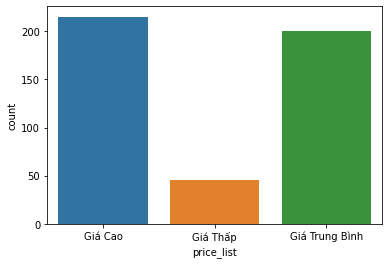

In [ ]:
#plt.figure(figsize=(25,20))
sns.countplot(x= df['price_list'])

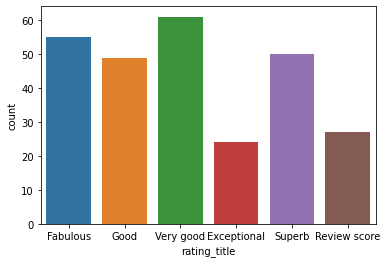

In [ ]:
#plt.figure(figsize=(16,4))
sns.countplot(x= df['rating_title'])

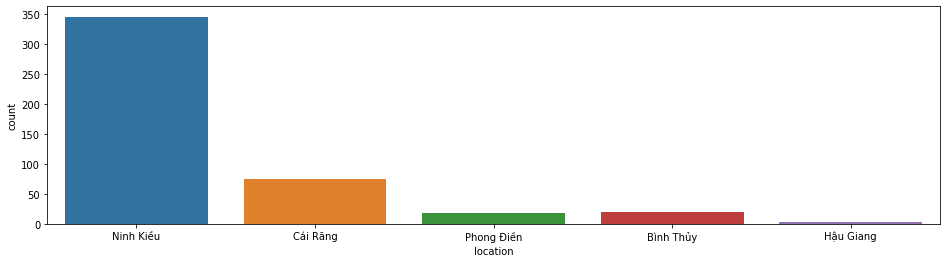

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x= df['location'])

In [ ]:
df_group = df.groupby('room_type')
print(df_group.sum())

                                           id_hotels  rating  price
room_type                                                          
Bed in 4-Bed Dormitory Room                     1738    41.4    744
Bed in 6-Bed Mixed Dormitory Room               3907    74.8    313
Budget Double Room                                80    16.6     18
Cottage with Garden View                        3507    51.6    255
Deluxe Bungalow with Garden View                1673    29.6    141
Deluxe Double Room                              4086    94.1    626
Deluxe Double Room with Balcony                   36    17.6     75
Deluxe Queen Room                               1869    43.7    169
Deluxe Queen Room with Two Queen Beds           3774    53.3    441
Deluxe Room                                     3956    75.2    363
Deluxe Room (2 Adults + 1 Child)                  67     0.0      8
Double Room                                    11328   204.3   1024
Double Room with Balcony                        

In [4]:
df = pd.read_csv("datasets_reviews_hotels.csv")
df.head(5)

,id_user,user,id_hotels,title,rating,reviews
0,0,A_och_F,0,Khách sạn tuyệt vời và thân thiện ở trung tâm ...,4,Chúng tôi ở đây trong 3 đêm vào tháng 12 - 2 n...
1,1,rw005x9966,0,Khách sạn tuyệt vời,2,Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn ...
2,2,FairFoodCritic,0,Vị trí tuyệt vời & nhân viên khách sạn phía tr...,3,Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã...
3,3,JyriE,0,Vị trí tuyệt vời,5,Khách sạn tốt. Nhân viên thực sự tốt đẹp và hữ...
4,4,winst0n53,0,Gần với tất cả các điểm tham quan chính và tru...,5,rất gần với tất cả các điểm tham quan chính. ...


In [5]:
sentiments = []
for review in df['reviews']:
    if TextBlob(review).sentiment.polarity < 0:
        sentiments.append("Negative")
    if TextBlob(review).sentiment.polarity == 0:
        sentiments.append("Neutral")
    if TextBlob(review).sentiment.polarity > 0:
        sentiments.append("Positive")
df["Sentiment"] = np.array(sentiments)

In [6]:
df

,id_user,user,id_hotels,title,rating,reviews,Sentiment
0,0,A_och_F,0,Khách sạn tuyệt vời và thân thiện ở trung tâm ...,4,Chúng tôi ở đây trong 3 đêm vào tháng 12 - 2 n...,Neutral
1,1,rw005x9966,0,Khách sạn tuyệt vời,2,Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn ...,Neutral
2,2,FairFoodCritic,0,Vị trí tuyệt vời & nhân viên khách sạn phía tr...,3,Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã...,Neutral
3,3,JyriE,0,Vị trí tuyệt vời,5,Khách sạn tốt. Nhân viên thực sự tốt đẹp và hữ...,Neutral
4,4,winst0n53,0,Gần với tất cả các điểm tham quan chính và tru...,5,rất gần với tất cả các điểm tham quan chính. ...,Neutral
...,...,...,...,...,...,...,...
28157,130,glf2010,460,Vị trí tuyệt vời và dịch vụ dễ chịu,4,Chất lượng tuyệt vời ! Tôi đã đến đây 2 lần và...,Neutral
28158,131,Luca M,460,Yêu khách sạn này !!,4,Phòng ốc thoải mái sạch đẹp.anh chị nhân viên ...,Neutral
28159,132,janeelijan,460,Một trải nghiệm đáng thất vọng tại một khách s...,4,Dịch vụ tốt nhất định sẽ quay lại vào lần sau❤...,Neutral
28160,133,Clare B,460,Đánh giá của Martello,4,Mọi dịch vụ đều không chê vào đâu được. Đồ ăn ...,Neutral


In [7]:
df['rating'].value_counts()

5    10291
4     9085
3     3495
2     2967
1     2324
Name: rating, dtype: int64

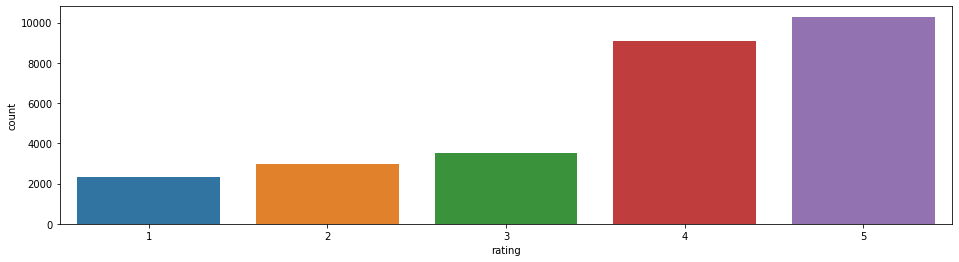

In [8]:
plt.figure(figsize=(16,4))
sns.countplot(x= df['rating'])

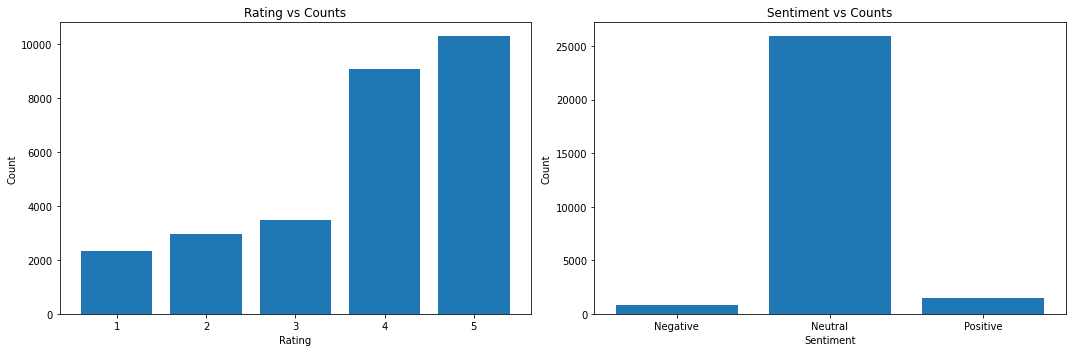

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x_axis,counts = np.unique(df['rating'],return_counts=True)
plt.bar([str(i) for i in x_axis],counts)
plt.title("Rating vs Counts")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1,2,2)
x_axis,counts = np.unique(df['Sentiment'],return_counts=True)
plt.bar(x_axis,counts)
plt.title("Sentiment vs Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

In [10]:
df['Word_count']= df['reviews'].map(lambda x: len(x.split()))
df

,id_user,user,id_hotels,title,rating,reviews,Sentiment,Word_count
0,0,A_och_F,0,Khách sạn tuyệt vời và thân thiện ở trung tâm ...,4,Chúng tôi ở đây trong 3 đêm vào tháng 12 - 2 n...,Neutral,56
1,1,rw005x9966,0,Khách sạn tuyệt vời,2,Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn ...,Neutral,60
2,2,FairFoodCritic,0,Vị trí tuyệt vời & nhân viên khách sạn phía tr...,3,Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã...,Neutral,50
3,3,JyriE,0,Vị trí tuyệt vời,5,Khách sạn tốt. Nhân viên thực sự tốt đẹp và hữ...,Neutral,39
4,4,winst0n53,0,Gần với tất cả các điểm tham quan chính và tru...,5,rất gần với tất cả các điểm tham quan chính. ...,Neutral,54
...,...,...,...,...,...,...,...,...
28157,130,glf2010,460,Vị trí tuyệt vời và dịch vụ dễ chịu,4,Chất lượng tuyệt vời ! Tôi đã đến đây 2 lần và...,Neutral,70
28158,131,Luca M,460,Yêu khách sạn này !!,4,Phòng ốc thoải mái sạch đẹp.anh chị nhân viên ...,Neutral,53
28159,132,janeelijan,460,Một trải nghiệm đáng thất vọng tại một khách s...,4,Dịch vụ tốt nhất định sẽ quay lại vào lần sau❤...,Neutral,49
28160,133,Clare B,460,Đánh giá của Martello,4,Mọi dịch vụ đều không chê vào đâu được. Đồ ăn ...,Neutral,48


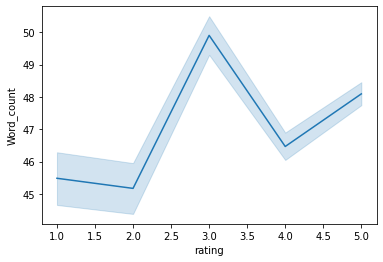

In [11]:
sns.lineplot(x='rating', data=df, y='Word_count')

In [12]:
from textblob import TextBlob

In [13]:
def polarity(text):
    blob= TextBlob(text)
    blob.sentiment
    polarity= blob.sentiment.polarity
    
    return polarity

def subjectivity(text):
    blob= TextBlob(text)
    blob.sentiment
    subjectivity= blob.sentiment.subjectivity
    
    return subjectivity

In [14]:
df['Polarity']= df['reviews'].apply(polarity)
df['Subjectivity']= df['reviews'].apply(subjectivity)
df

,id_user,user,id_hotels,title,rating,reviews,Sentiment,Word_count,Polarity,Subjectivity
0,0,A_och_F,0,Khách sạn tuyệt vời và thân thiện ở trung tâm ...,4,Chúng tôi ở đây trong 3 đêm vào tháng 12 - 2 n...,Neutral,56,0.0,0.0
1,1,rw005x9966,0,Khách sạn tuyệt vời,2,Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn ...,Neutral,60,0.0,0.0
2,2,FairFoodCritic,0,Vị trí tuyệt vời & nhân viên khách sạn phía tr...,3,Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã...,Neutral,50,0.0,0.0
3,3,JyriE,0,Vị trí tuyệt vời,5,Khách sạn tốt. Nhân viên thực sự tốt đẹp và hữ...,Neutral,39,0.0,0.0
4,4,winst0n53,0,Gần với tất cả các điểm tham quan chính và tru...,5,rất gần với tất cả các điểm tham quan chính. ...,Neutral,54,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
28157,130,glf2010,460,Vị trí tuyệt vời và dịch vụ dễ chịu,4,Chất lượng tuyệt vời ! Tôi đã đến đây 2 lần và...,Neutral,70,0.0,0.0
28158,131,Luca M,460,Yêu khách sạn này !!,4,Phòng ốc thoải mái sạch đẹp.anh chị nhân viên ...,Neutral,53,0.0,0.0
28159,132,janeelijan,460,Một trải nghiệm đáng thất vọng tại một khách s...,4,Dịch vụ tốt nhất định sẽ quay lại vào lần sau❤...,Neutral,49,0.0,0.0
28160,133,Clare B,460,Đánh giá của Martello,4,Mọi dịch vụ đều không chê vào đâu được. Đồ ăn ...,Neutral,48,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



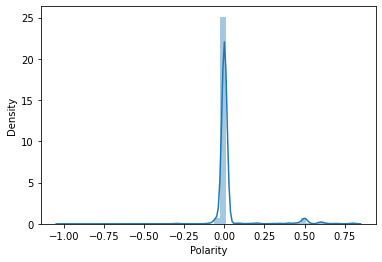

In [ ]:
sns.distplot(df['Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



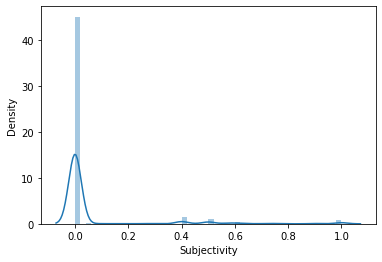

In [ ]:
sns.distplot(df['Subjectivity'])

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating.value_counts().index, y=df.Polarity.value_counts().tolist())])
fig.update_layout(
    title="Mức độ đánh giá so với Polarity",
    xaxis_title="Rating",
    yaxis_title="Polarity")
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating.value_counts().index, y=df.Subjectivity.value_counts().tolist())])
fig.update_layout(
    title="Mức độ đánh giá so với Subjectivity",
    xaxis_title="Rating",
    yaxis_title="Subjectivity")
fig.show()

In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
#plt.legend()
#plt.show()
#plt.savefig("Loss plot.jpg")

In [15]:
import spacy
nlp= spacy.load('en_core_web_sm')

In [16]:
def preprocess(text):
    lower= text.lower()
    doc= nlp(lower)
    tokens= [token.lemma_ for token in doc ]
    a_lemma= [lemma for lemma in tokens if lemma not in spacy.lang.en.stop_words.STOP_WORDS and lemma.isalpha()]
    return " ".join(a_lemma)

In [17]:
df['Review_new']= df['reviews'].apply(preprocess)

In [18]:
df

,id_user,user,id_hotels,title,rating,reviews,Sentiment,Word_count,Polarity,Subjectivity,Review_new
0,0,A_och_F,0,Khách sạn tuyệt vời và thân thiện ở trung tâm ...,4,Chúng tôi ở đây trong 3 đêm vào tháng 12 - 2 n...,Neutral,56,0.0,0.0,chúng tôi ở đây trong đêm vào tháng người lớn ...
1,1,rw005x9966,0,Khách sạn tuyệt vời,2,Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn ...,Neutral,60,0.0,0.0,đã dành đêm ở đây từ mọi thứ về khách sạn này ...
2,2,FairFoodCritic,0,Vị trí tuyệt vời & nhân viên khách sạn phía tr...,3,Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã...,Neutral,50,0.0,0.0,tôi ở đêm chỉ trong tuần qua ban đầu tôi đã đặ...
3,3,JyriE,0,Vị trí tuyệt vời,5,Khách sạn tốt. Nhân viên thực sự tốt đẹp và hữ...,Neutral,39,0.0,0.0,khách sạn tốt nhân viên thực sự tốt đẹp và hữu...
4,4,winst0n53,0,Gần với tất cả các điểm tham quan chính và tru...,5,rất gần với tất cả các điểm tham quan chính. ...,Neutral,54,0.0,0.0,rất gần với tất cả các điểm tham quan chính ch...
...,...,...,...,...,...,...,...,...,...,...,...
28157,130,glf2010,460,Vị trí tuyệt vời và dịch vụ dễ chịu,4,Chất lượng tuyệt vời ! Tôi đã đến đây 2 lần và...,Neutral,70,0.0,0.0,chất lượng tuyệt vời tôi đã đến đây lần vào mỗ...
28158,131,Luca M,460,Yêu khách sạn này !!,4,Phòng ốc thoải mái sạch đẹp.anh chị nhân viên ...,Neutral,53,0.0,0.0,phòng ốc thoải mái sạch chị nhân viên rất nhiệ...
28159,132,janeelijan,460,Một trải nghiệm đáng thất vọng tại một khách s...,4,Dịch vụ tốt nhất định sẽ quay lại vào lần sau❤...,Neutral,49,0.0,0.0,dịch vụ tốt nhất định sẽ quay lại vào lần sau ...
28160,133,Clare B,460,Đánh giá của Martello,4,Mọi dịch vụ đều không chê vào đâu được. Đồ ăn ...,Neutral,48,0.0,0.0,mọi dịch vụ đều không chê vào đâu được đồ ăn s...


In [19]:
rev= " ".join([review for review in df['Review_new']])
rev[:2000]

'chúng tôi ở đây trong đêm vào tháng người lớn và một đứa trẻ tuổi một thời gian đáng yêu để ở với đèn giáng sinh và chợ giáng sinh ở những nơi des vô tội ngay xung quanh góc chúng tôi ở trong một phòng tiêu chuẩn và thêm đã dành đêm ở đây từ mọi thứ về khách sạn này đều tuyệt vời không thể giới thiệu nó đủ cao nhân viên đều tuyệt vời phòng không tì vết ăn sáng mọi thứ bạn có thể muốn quán bar rất tốt tôi đã ở lại một số tiểu thuyết đây là tốt nhất cũng hoàn hảo tôi ở đêm chỉ trong tuần qua ban đầu tôi đã đặt một căn phòng cao cấp nhưng đã quyết định nâng cấp lên một bộ junior trong ngày đầu tiên để có một khoản phí danh nghĩa vì tôi muốn có một cái nhìn về sacre khác khách sạn tốt nhân viên thực sự tốt đẹp và hữu ích trong quầy lễ tân đóng nhiều điểm hấp dẫn và với metro mọi thứ đóng của khách sạn có rất nhiều nhà hàng bữa sáng rất tốt rất gần với tất cả các điểm tham quan chính chỉ có nhược điểm là khi chúng ta ở đó vào tháng họ đang thực hiện cải tạo cho khách sạn và có sự gián đoạn

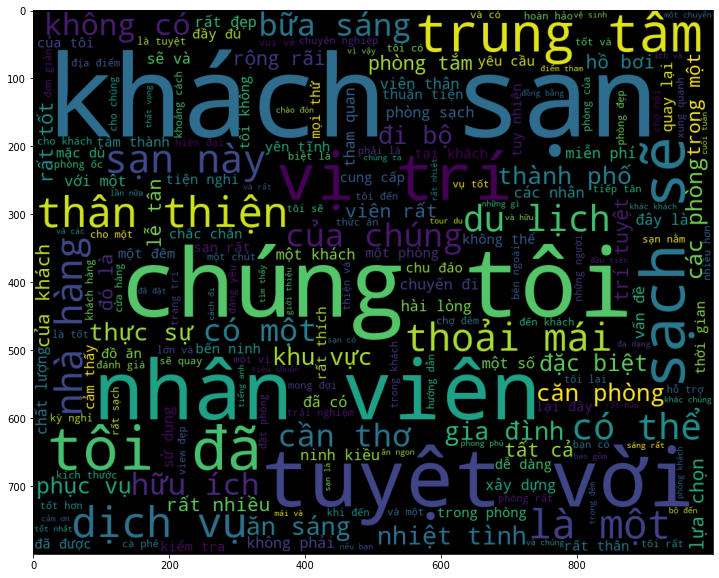

In [20]:
from wordcloud import WordCloud
plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev)
plt.imshow(wc)

In [21]:
def sentiment(Review_new):
    if Review_new>=3:
        return '1'
    else:
        return '0'
df['Sentiment']= df['rating'].apply(sentiment)
df

,id_user,user,id_hotels,title,rating,reviews,Sentiment,Word_count,Polarity,Subjectivity,Review_new
0,0,A_och_F,0,Khách sạn tuyệt vời và thân thiện ở trung tâm ...,4,Chúng tôi ở đây trong 3 đêm vào tháng 12 - 2 n...,1,56,0.0,0.0,chúng tôi ở đây trong đêm vào tháng người lớn ...
1,1,rw005x9966,0,Khách sạn tuyệt vời,2,Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn ...,0,60,0.0,0.0,đã dành đêm ở đây từ mọi thứ về khách sạn này ...
2,2,FairFoodCritic,0,Vị trí tuyệt vời & nhân viên khách sạn phía tr...,3,Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã...,1,50,0.0,0.0,tôi ở đêm chỉ trong tuần qua ban đầu tôi đã đặ...
3,3,JyriE,0,Vị trí tuyệt vời,5,Khách sạn tốt. Nhân viên thực sự tốt đẹp và hữ...,1,39,0.0,0.0,khách sạn tốt nhân viên thực sự tốt đẹp và hữu...
4,4,winst0n53,0,Gần với tất cả các điểm tham quan chính và tru...,5,rất gần với tất cả các điểm tham quan chính. ...,1,54,0.0,0.0,rất gần với tất cả các điểm tham quan chính ch...
...,...,...,...,...,...,...,...,...,...,...,...
28157,130,glf2010,460,Vị trí tuyệt vời và dịch vụ dễ chịu,4,Chất lượng tuyệt vời ! Tôi đã đến đây 2 lần và...,1,70,0.0,0.0,chất lượng tuyệt vời tôi đã đến đây lần vào mỗ...
28158,131,Luca M,460,Yêu khách sạn này !!,4,Phòng ốc thoải mái sạch đẹp.anh chị nhân viên ...,1,53,0.0,0.0,phòng ốc thoải mái sạch chị nhân viên rất nhiệ...
28159,132,janeelijan,460,Một trải nghiệm đáng thất vọng tại một khách s...,4,Dịch vụ tốt nhất định sẽ quay lại vào lần sau❤...,1,49,0.0,0.0,dịch vụ tốt nhất định sẽ quay lại vào lần sau ...
28160,133,Clare B,460,Đánh giá của Martello,4,Mọi dịch vụ đều không chê vào đâu được. Đồ ăn ...,1,48,0.0,0.0,mọi dịch vụ đều không chê vào đâu được đồ ăn s...


In [ ]:
#df.to_csv('2.csv',encoding="utf-8-sig",index=False)
#len(data)

2445

In [ ]:
#nationsGrp.groups

{0: [0, 1, 2, 3], 1: [4, 5, 6, 7, 8, 9, 10, 11, 12], 2: [13, 14, 15, 16], 3: [17, 18, 19, 20], 4: [21, 22, 23, 24], 5: [25, 26, 27, 28, 29, 30], 6: [31, 32, 33, 34, 35, 36, 37, 38, 39], 7: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 8: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 9: [61, 62, 63, 64, 65, 66, 67, 68, 69, 70], 10: [71, 72, 73, 74, 75, 76, 77, 78, 79], 11: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90], 12: [91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], 13: [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112], 14: [113, 114, 115, 116, 117, 118, 119, 120, 121, 122], 15: [123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135], 16: [136, 137, 138, 139, 140, 141, 142, 143, 144, 145], 17: [146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157], 18: [158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169], 19: [170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180], 20: [181, 182, 183, 184, 185, 186, 187, 188, 189], 21: [190, 191, 192, 193, 194, 195, 196, 197

In [ ]:
#subsetting dataset
#data=df[['id_motels','Sentiment']]
#data

,id_motels,Sentiment
0,0,1
1,0,-1
2,0,0
3,0,1
4,1,1
...,...,...
2440,403,0
2441,403,0
2442,403,1
2443,403,0


In [ ]:
#dt=data.query('id_motels=="16"')
#dt

,id_motels,Sentiment
136,16,1
137,16,1
138,16,1
139,16,-1
140,16,1
141,16,1
142,16,0
143,16,-1
144,16,-1
145,16,-1


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

In [23]:
X= df['Review_new']
y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.25, stratify=y)

In [24]:
X_train

7470     khách sạn tuyệt vời với một vị trí tuyệt vời k...
22693    đây có thể nói là một trong những khách sạn đẹ...
26176    chúng tôi chỉ dành một đêm ở đây như một phần ...
27135    khách sạn rất đẹp vị trí thuận lợi gần bến tàu...
19749    ok phòng bể bơi và nhân viên giường rất cứng c...
                               ...                        
6901     tất cả mọi thứ về khách sạn này là tuyệt vời c...
16678    vị trí tuyệt vời nhân viên rất hữu ích thực sự...
17736    người phối ngẫu seattle giá trị tuyệt vời đã ở...
4303     phòng khá lớn với khu vực sinh hoạt xa hoa và ...
19007    phòng sạch có kích thước tốt nhân viên hữu ích...
Name: Review_new, Length: 21121, dtype: object

In [25]:
y_train

7470     1
22693    1
26176    1
27135    1
19749    0
        ..
6901     1
16678    1
17736    1
4303     1
19007    1
Name: Sentiment, Length: 21121, dtype: object

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_transformed= tfidf.fit_transform(X_train.values)
X_test_transformed= tfidf.transform(X_test.values)

In [28]:
X_train_transformed.shape

(21121, 10000)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)
y_pred= rfc.predict(X_test_transformed)

rfc.score(X_test_transformed, y_test)

0.9145007811390428

In [30]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_transformed, y_train)
y_pred= lr.predict(X_test_transformed)

lr.score(X_test_transformed, y_test)

0.9073995171140463

In [31]:
vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(df['Review_new']).toarray(),
                                                 df['Sentiment'].values,
                                                 test_size = 0.2,
                                                 random_state=42)

In [32]:
clf = LogisticRegression(solver='liblinear',random_state=0)
clf.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

Train Accuracy : 90.66 %
Test Accuracy  : 90.25 %


In [35]:
for i in range (0,100):
  vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
  X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(df['Review_new']).toarray(),
                                                 df['Sentiment'].values,
                                                 test_size = 0.3,
                                                 random_state=42 + i)
  
  clf = LogisticRegression(solver='liblinear',random_state= i)
  clf.fit(X_train,Y_train)
  
  rfc= RandomForestClassifier()
  rfc.fit(X_train,Y_train)
  print("Lân thứ ", i)
  print("Train Accuracy LogisticRegression : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
  print("Test Accuracy  LogisticRegression: {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))
  print("Train Accuracy RandomForestClassifier: {:.2f} %".format(accuracy_score(rfc.predict(X_train),Y_train)*100))
  print("Test Accuracy  RandomForestClassifier: {:.2f} %".format(accuracy_score(rfc.predict(X_test),Y_test)*100))
  print("\n")

Lân thứ  0
Train Accuracy LogisticRegression : 90.17 %
Test Accuracy  LogisticRegression: 90.25 %
Train Accuracy RandomForestClassifier: 92.81 %
Test Accuracy  RandomForestClassifier: 92.45 %


Lân thứ  1
Train Accuracy LogisticRegression : 90.70 %
Test Accuracy  LogisticRegression: 89.27 %
Train Accuracy RandomForestClassifier: 93.16 %
Test Accuracy  RandomForestClassifier: 91.36 %


Lân thứ  2
Train Accuracy LogisticRegression : 90.41 %
Test Accuracy  LogisticRegression: 90.06 %
Train Accuracy RandomForestClassifier: 92.94 %
Test Accuracy  RandomForestClassifier: 92.16 %


Lân thứ  3
Train Accuracy LogisticRegression : 90.50 %
Test Accuracy  LogisticRegression: 89.69 %
Train Accuracy RandomForestClassifier: 92.98 %
Test Accuracy  RandomForestClassifier: 91.80 %


Lân thứ  4
Train Accuracy LogisticRegression : 90.43 %
Test Accuracy  LogisticRegression: 89.42 %
Train Accuracy RandomForestClassifier: 92.98 %
Test Accuracy  RandomForestClassifier: 91.86 %


Lân thứ  5
Train Accuracy Logi

In [ ]:
empty = []

for i in df.itertuples():
    if type(review) == str:
        if review.isspace():
            empty.append(i) # lấy chỉ mục của bài đánh giá 
            
            
print(f"There are total {len(empty)} empty strings as review.")

There are total 0 empty strings as review.


In [ ]:
# gán Id cho tất cả các từ duy nhất có trong cột Review_new
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['Review_new'])

In [ ]:
# tổng số từ duy nhất có trong tất cả các bản tóm tắt được kết hợp
vocab_size = len(tokenizer.index_word)

# tokeninzer.index_word là một từ điển mà người dùng có thể xem tất cả các từ duy nhất và ID của chúng.

print(f'There are total {vocab_size} unique words present')

There are total 2626 unique words present


In [ ]:
# thay thế từng từ trong bài đánh giá bằng mã thông báo tương ứng
sequences = tokenizer.texts_to_sequences(df['Review_new'])
tokenizer.index_word

{1: 'và',
 2: 'tôi',
 3: 'khách',
 4: 'một',
 5: 'phòng',
 6: 'sạn',
 7: 'có',
 8: 'rất',
 9: 'không',
 10: 'chúng',
 11: 'là',
 12: 'ở',
 13: 'đã',
 14: 'viên',
 15: 'nhân',
 16: 'tuyệt',
 17: 'với',
 18: 'tốt',
 19: 'trong',
 20: 'của',
 21: 'vời',
 22: 'sẽ',
 23: 'các',
 24: 'được',
 25: 'cho',
 26: 'đi',
 27: 'bạn',
 28: 'đến',
 29: 'lại',
 30: 'đẹp',
 31: 'vị',
 32: 'sáng',
 33: 'trí',
 34: 'khác',
 35: 'ăn',
 36: 'vụ',
 37: 'sạch',
 38: 'để',
 39: 'này',
 40: 'nhiều',
 41: 'nhưng',
 42: 'đây',
 43: 'nhà',
 44: 'người',
 45: 'cần',
 46: 'sự',
 47: 'hàng',
 48: 'hơn',
 49: 'đêm',
 50: 'nó',
 51: 'khi',
 52: 'những',
 53: 'như',
 54: 'tâm',
 55: 'thể',
 56: 'trung',
 57: 'đó',
 58: 'thân',
 59: 'dịch',
 60: 'giá',
 61: 'thiện',
 62: 'thực',
 63: 'bữa',
 64: 'cả',
 65: 'về',
 66: 'lớn',
 67: 'vào',
 68: 'lịch',
 69: 'bộ',
 70: 'tại',
 71: 'mái',
 72: 'đặt',
 73: 'du',
 74: 'nói',
 75: 'chọn',
 76: 'gần',
 77: 'ra',
 78: 'khu',
 79: 'thấy',
 80: 'phố',
 81: 'thoải',
 82: 'ngày',
 83: 

In [ ]:
# tạo mô hình RNN-NLP, mỗi đầu vào phải có độ dài bằng nhau
from tensorflow.keras.preprocessing.sequence import pad_sequences

# độ dài của đầu vào là 100. Vì vậy, nếu bất kỳ đầu vào nào có độ dài nhỏ hơn 100, các số 0 thừa sẽ được thêm vào
# Bất kỳ đầu vào nào có độ dài hơn 100 sẽ bị loại bỏ từ thừa.
sequences_padded = pad_sequences(sequences,maxlen=100,padding='post')
sequences_padded

array([[ 10,   2,  12, ...,   0,   0,   0],
       [ 13, 332,  49, ...,   0,   0,   0],
       [  2,  12,  49, ...,   0,   0,   0],
       ...,
       [136, 317,   2, ...,   0,   0,   0],
       [  2,  26, 192, ...,   0,   0,   0],
       [ 35, 262,  88, ...,   0,   0,   0]], dtype=int32)

In [ ]:
df[['Sentiment']] = df[['Sentiment']].astype('int')
df['Sentiment'].unique()
y = np.array(df['Sentiment'])
y

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
# chia dữ liệu thành nhóm test và nhóm thử nghiệm
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(sequences_padded,y,test_size=0.3)

In [ ]:
#Các thư viện để tạo và đào tạo mô hình
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

In [ ]:
# Model
max_len = 100 # độ dài của mỗi đầu vào
embedding_size = 32

model = Sequential()

model.add(Embedding(vocab_size+1,embedding_size,input_length = max_len))

model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           84064     
_________________________________________________________________
lstm (LSTM)                  (None, 100, 150)          109800    
_________________________________________________________________
dropout (Dropout)            (None, 100, 150)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               38656     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
# train our model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
309/309 [==============================] - 186s 586ms/step - loss: 0.4661 - accuracy: 0.8234 - val_loss: 0.7570 - val_accuracy: 0.8061
Epoch 2/15
309/309 [==============================] - 180s 584ms/step - loss: 0.4383 - accuracy: 0.8337 - val_loss: 0.4101 - val_accuracy: 0.8234
Epoch 3/15
309/309 [==============================] - 180s 583ms/step - loss: 0.4085 - accuracy: 0.8289 - val_loss: 0.4325 - val_accuracy: 0.8041
Epoch 4/15
309/309 [==============================] - 179s 581ms/step - loss: 0.4314 - accuracy: 0.8352 - val_loss: 0.4175 - val_accuracy: 0.8421
Epoch 5/15
309/309 [==============================] - 180s 582ms/step - loss: 0.4370 - accuracy: 0.8246 - val_loss: 0.4737 - val_accuracy: 0.8041
Epoch 6/15
309/309 [==============================] - 179s 578ms/step - loss: 0.4498 - accuracy: 0.8148 - val_loss: 0.4678 - val_accuracy: 0.8041
Epoch 7/15
309/309 [==============================] - 179s 580ms/step - loss: 0.4693 - accuracy: 0.8153 - val_loss: 0.4950 -

In [ ]:
metrics = pd.DataFrame(model.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.466093,0.823446,0.757032,0.806071
1,0.438260,0.833671,0.410122,0.823432
2,0.408548,0.828862,0.432514,0.804063
3,0.431377,0.835240,0.417533,0.842093
4,0.436971,0.824610,0.473694,0.804063
5,0.449811,0.814841,0.467844,0.804063
6,0.469345,0.815347,0.495015,0.804063
7,0.437797,0.828812,0.497296,0.804063
8,0.479986,0.815347,0.496005,0.804063
9,0.478875,0.815347,0.490430,0.804063


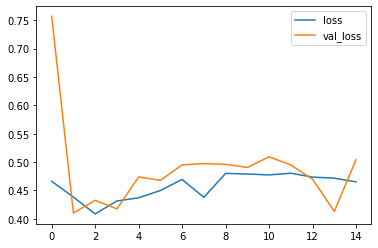

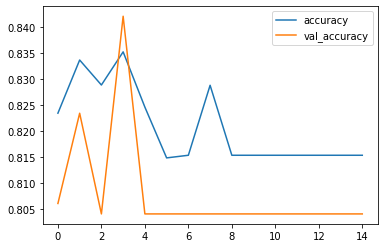

In [ ]:
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
# dự đoán về một vài bài đánh giá
neg_review = ['Đã dành 4 đêm ở đây từ . Mọi thứ về khách sạn này đều tuyệt vời. Không thể giới thiệu nó đủ cao. Nhân viên đều tuyệt vời. Phòng không tì vết. Ăn sáng mọi thứ bạn có thể muốn. Quán bar rất tốt. Tôi đã ở lại một số tiểu thuyết, đây là tốt nhất. Cũng hoàn hảo ']

# This is a negative review.Let's check if the model is able to predict it

In [ ]:
# mã hóa và thực hiện pad_sequence để làm đúng định dạng được chấp nhận bởi mô hình
neg_review_token = tokenizer.texts_to_sequences(neg_review)

# padding
neg_review_padded = pad_sequences(neg_review_token,maxlen=100,padding='post')

In [ ]:
review_predict = (model.predict(neg_review_padded)>0.5).astype('int32')

In [ ]:
# 1 là đánh giá tích cực và 0 là đánh giá tiêu cực
if review_predict[0] == 0:
    print("Đó là một đánh giá tiêu cực")
else:
    print("Đó là một đánh giá tích cực")

It's a positive review


In [ ]:
# thử một cái khác
pos_review = ["Tôi ở 4 đêm chỉ trong tuần qua! Ban đầu tôi đã đặt một căn phòng cao cấp nhưng đã quyết định nâng cấp lên một bộ Junior trong ngày đầu tiên để có một khoản phí danh nghĩa vì tôi muốn có một cái nhìn về Sacre ... Khác"]

# Tokenization
pos_review = tokenizer.texts_to_sequences(pos_review)

# padding
pos_review = pad_sequences(pos_review,maxlen=100,padding='post')

# prediction
review_predict = (model.predict(pos_review)>0.5).astype('int')

if review_predict[0] == 0:
    print("Đó là một đánh giá tiêu cực")
else:
    print("Đó là một đánh giá tích cực")

It's a positive review


In [ ]:
# dự đoán trên X_test
prediction = (model.predict(X_test)>0.5).astype('int32')
# Đánh giá
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1659
           1       0.80      1.00      0.89      6808

    accuracy                           0.80      8467
   macro avg       0.40      0.50      0.45      8467
weighted avg       0.65      0.80      0.72      8467



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

